In [38]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#I'm importing data from the Global Economy website with key information on health spend per capita per country. I'll use this information to compare with the average premium charged in each country. 

healthspent = requests.get('https://www.theglobaleconomy.com/rankings/health_spending_per_capita/')
HS = bs(healthspent.content, 'lxml')
table = HS.find("table", {"class":"sortable"})
HSpcap = pd.read_html(str(table))[0]
HSpcap

,Countries,"Health spending per capita, 2019",Global rank,Available data
0,USA,10921.01,1,2000 - 2019
1,Switzerland,9666.34,2,2000 - 2019
2,Norway,8007.40,3,2000 - 2019
3,Iceland,6274.96,4,2000 - 2019
4,Luxembourg,6220.74,5,2000 - 2019
...,...,...,...,...
176,Ethiopia,26.74,177,2000 - 2019
177,Eritrea,25.27,178,2000 - 2019
178,Burundi,20.57,179,2000 - 2019
179,DR Congo,20.57,180,2000 - 2019


In [39]:
#I'm importing a csv file contaning all data regarding individual policy sales performed between Jan and Sep 2022. For the purpose of this research all personal details such as names and date of birth have been removed prior to importing this file. 

fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
fs22grouped = fs22_sales.groupby("Sales Region Country").sum()
fs22sorted = fs22grouped.sort_values("Premium (converted)", ascending=False)
fs22filtered = fs22sorted.drop(columns=["Premium"])
fs22renamed = fs22filtered.rename(columns={'Won': 'Policies won', 'Premium (converted)': 'Total Premium (€)'})
Aver_premium = fs22renamed['Total Premium (€)'] / fs22renamed['Policies won']
fs22newcolumn = fs22renamed.assign(Prem_average=Aver_premium)
display(fs22newcolumn.dtypes)
fs22complete = fs22newcolumn.astype({"Total Premium (€)":'int', "Prem_average":'int'})
fs22complete.head(10)

Policies won           int64
Total Premium (€)    float64
Prem_average         float64
dtype: object

,Policies won,Total Premium (€),Prem_average
Sales Region Country,,,
UK,57,403130,7072
Germany,93,397450,4273
Singapore,36,359221,9978
France,94,240088,2554
Spain,62,197620,3187
USA,19,197543,10397
Thailand,29,166308,5734
China,21,131817,6277
Belgium,120,118159,984


Policies won                          int64
Total Premium (€)                     int64
Prem_average                          int64
Countries                            object
Health spending per capita, 2019    float64
Global rank                           int64
HS_EUR                              float64
dtype: object

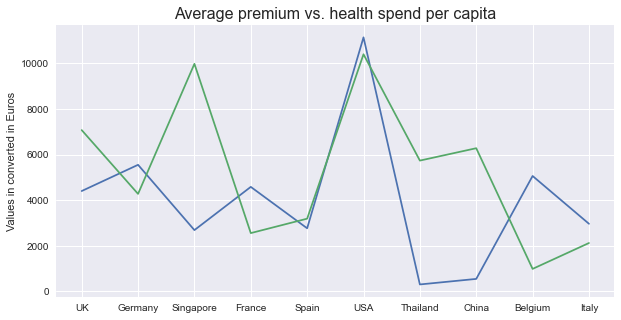

In [40]:
# I want to compare the average premium charged against the health spend per capita on the 10 top most expensive countries.

SalesQ1_Q2 = fs22complete.merge(HSpcap, left_on='Sales Region Country', right_on='Countries')

Q1_Q2sorted = SalesQ1_Q2.sort_values("Total Premium (€)", ascending=False)
Q1_Q2drop = Q1_Q2sorted.drop(columns=["Available data"]).head(10)
USDconversion = Q1_Q2drop['Health spending per capita, 2019'] * (1.02)
EURnewcolumn = Q1_Q2drop.assign(HS_EUR=USDconversion)
display(EURnewcolumn.dtypes)
fs22converted = EURnewcolumn.astype({"HS_EUR":'int'})
HSsales = fs22converted.rename(columns={'HS_EUR': 'Health spend p/c 2019 (€)'})
HSfinal = HSsales.drop(columns=["Health spending per capita, 2019"])
HSfinal

plt.subplots(figsize=(10,5))

plt.plot(HSfinal['Countries'],HSfinal['Health spend p/c 2019 (€)'])
plt.plot(HSfinal['Countries'],HSfinal['Prem_average'])
plt.ylabel('Values in converted in Euros')
plt.title('Average premium vs. health spend per capita', size=16)
plt.savefig('AveragePHS.png')
plt.show()

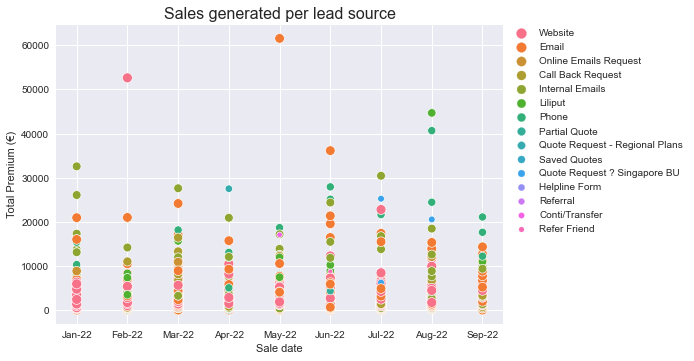

In [41]:
# I want to see which source is generating more leads so we can maximize future opportunities.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
fs22_name = fs22_sales.rename(columns={'Premium (converted)': 'Total Premium (€)'})
sns.scatterplot(x='Sale date',y='Total Premium (€)', data=fs22_name, hue='Lead Source', size='Lead Source')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Sales generated per lead source", size=16)
plt.savefig('SalesPlead.png', dpi=300, bbox_inches='tight')
plt.show()

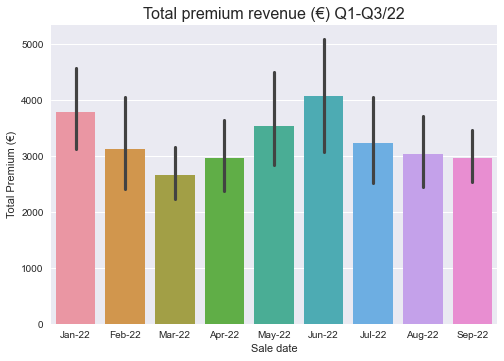

In [42]:
# Overview of total premium collected from Q1-Q3 2022.

fs22_sales = pd.read_csv('/Users/eoin/Downloads/IndividualSalesReport_2022.csv')
sns.barplot(data=fs22_sales, y='Premium (converted)', x='Sale date')
plt.title("Total premium revenue (€) Q1-Q3/22", size=16)
plt.ylabel("Total Premium (€)")
plt.savefig('SalesQ1_Q3.png')
plt.show()

In [43]:
# I'm creating a data frame with the top 10 performing countries (best sales revenue) and including the top 10 expat destination countries, so I can later analyse possible opportunities.

Top_Countries = pd.DataFrame({'country':    ['Mexico', 'Indonesia', 'Taiwan', 'Portugal', 'Spain', 'UAE', 'Vietnam', 'Thailand', 'Australia', 'Singapore', 'USA', 'Russia', 'Belgium', 'France', 'China', 'UK', 'Germany', 'Italy'],
         'Expat_ranking':    ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '14', '17', '29', '31', '33', '37', '42', '44']})

Top_Countries

,country,Expat_ranking
0,Mexico,01
1,Indonesia,02
2,Taiwan,03
3,Portugal,04
4,Spain,05
5,UAE,06
6,Vietnam,07
7,Thailand,08
8,Australia,09
9,Singapore,10


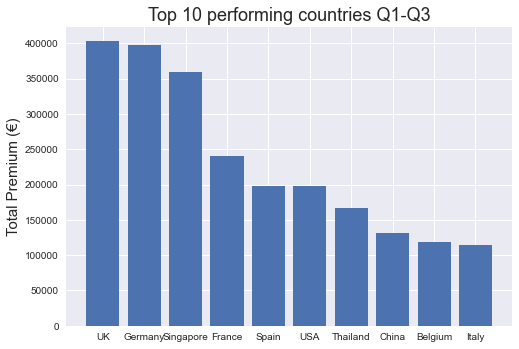

In [44]:

SalesQ1_Q3 = fs22complete.merge(Top_Countries, left_on='Sales Region Country', right_on='country')
TopSalesQ1_Q3 = SalesQ1_Q3.head(10)
TSQ1_Q3_sorted = TopSalesQ1_Q3.sort_values('Total Premium (€)', ascending=False)
plt.bar('country', 'Total Premium (€)',data=TSQ1_Q3_sorted)
plt.ylabel("Total Premium (€)", size=15)
plt.title("Top 10 performing countries Q1-Q3", size=18)
plt.savefig('TopPerfCountries.png')
plt.show()

In [45]:
# I want to see how many policies we sold (Policies won) and what was the total premium for each of the top 10 performing countries.

TSQ1_Q3_sorted = TopSalesQ1_Q3.rename(columns={'country': 'Countries'})
Q1_Q3topsales = TSQ1_Q3_sorted.set_index('Countries').head(10)
Q1_Q3topsales

,Policies won,Total Premium (€),Prem_average,Expat_ranking
Countries,,,,
UK,57,403130,7072,37
Germany,93,397450,4273,42
Singapore,36,359221,9978,10
France,94,240088,2554,31
Spain,62,197620,3187,05
USA,19,197543,10397,14
Thailand,29,166308,5734,08
China,21,131817,6277,33
Belgium,120,118159,984,29


In [46]:
# I want to see how many policies we sold (Policies won) and what was the total premium for each of the top 10 expat destinations.

Q1_Q2sorted = SalesQ1_Q3.sort_values("Expat_ranking", ascending=True)
Q1_Q2renamed = Q1_Q2sorted.rename(columns={'country': 'Countries'})
Q1_Q3opp = Q1_Q2renamed.set_index('Countries').head(10)
Q1_Q3opp


,Policies won,Total Premium (€),Prem_average,Expat_ranking
Countries,,,,
Mexico,14,86679,6191,01
Indonesia,29,98085,3382,02
Taiwan,5,14008,2801,03
Portugal,26,103706,3988,04
Spain,62,197620,3187,05
UAE,5,51843,10368,06
Vietnam,7,42448,6064,07
Thailand,29,166308,5734,08
Australia,6,8857,1476,09


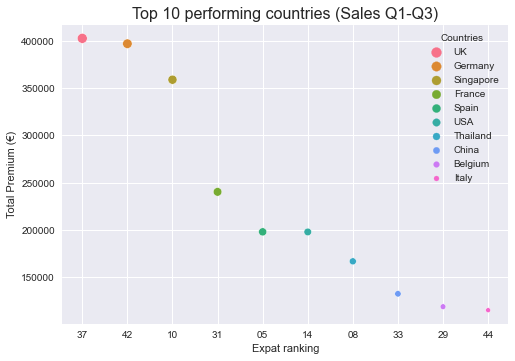

In [47]:
# I want to make a comparison between sales on top 10 performing countries and their corresponding Expat ranking versus the sales on top 10 prefered expat countries.  

sns.scatterplot(x='Expat_ranking',y='Total Premium (€)', data=Q1_Q3topsales, hue='Countries', size='Countries')
plt.title("Top 10 performing countries (Sales Q1-Q3)", size=16)
plt.xlabel("Expat ranking")
plt.savefig('Top10perform.png')
plt.show()

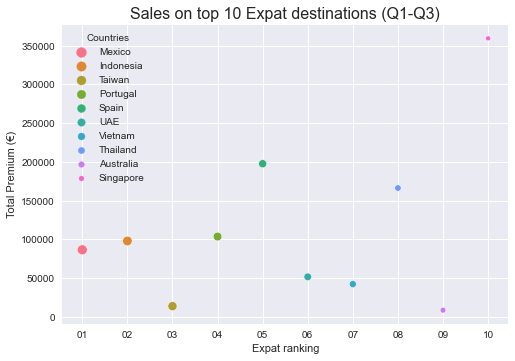

In [48]:
# I want to see how we-re performing in the top expat destinations so we can maximize campaign effort in countries where we are not selling so well but where there's high opportunity to grow.
sns.scatterplot(x='Expat_ranking',y='Total Premium (€)', data=Q1_Q3opp, hue='Countries', size='Countries')
plt.title("Sales on top 10 Expat destinations (Q1-Q3)", size=16)
plt.xlabel("Expat ranking")
plt.savefig('Top10dest.png')
plt.show()

In [49]:
Resid_Countries = pd.DataFrame({'Countries':    ['Germany', 'UAE', 'Spain', 'USA', 'UK', 'Switzerland', 'France', 'Italy', 'Netherlands', 'Canada', ],
         'Resid_rank':    ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']})
Resid_Countries

,Countries,Resid_rank
0,Germany,01
1,UAE,02
2,Spain,03
3,USA,04
4,UK,05
5,Switzerland,06
6,France,07
7,Italy,08
8,Netherlands,09
9,Canada,10


In [50]:
Q1_Q3merge = fs22complete.merge(Resid_Countries, left_on='Sales Region Country', right_on='Countries') 
Q1_Q3sorted = Q1_Q3merge.sort_values("Resid_rank", ascending=True)
Q1_Q3Sresd = Q1_Q3sorted.set_index('Countries').head(10)
Q1_Q3Sresd

,Policies won,Total Premium (€),Prem_average,Resid_rank
Countries,,,,
Germany,93,397450,4273,01
UAE,5,51843,10368,02
Spain,62,197620,3187,03
USA,19,197543,10397,04
UK,57,403130,7072,05
Switzerland,5,22939,4587,06
France,94,240088,2554,07
Italy,54,114445,2119,08
Netherlands,47,103156,2194,09


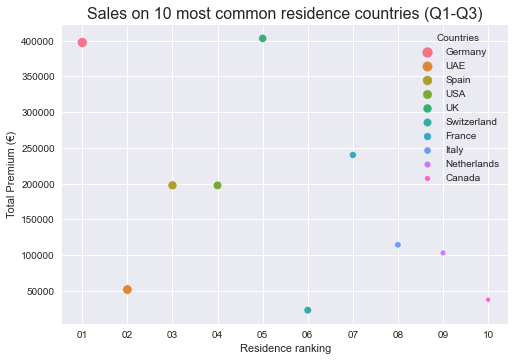

In [165]:
sns.scatterplot(x='Resid_rank',y='Total Premium (€)', data=Q1_Q3Sresd, hue='Countries', size='Countries')
plt.title("Sales on 10 most common residence countries (Q1-Q3)", size=16)
plt.xlabel("Residence ranking")
plt.savefig('Top10resid.png')
plt.show()